In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
pd.set_option('display.max_colwidth', None)

In [9]:
df_news = pd.read_pickle('./data/processed/chartdata_sent.pkl')
df_news['polarity'].value_counts()

1.000000    5
0.700000    4
0.684211    3
0.818182    3
0.666667    3
           ..
0.738462    1
0.830508    1
0.784810    1
0.809524    1
0.810811    1
Name: polarity, Length: 92, dtype: int64

In [11]:
df_news = pd.read_pickle('./data/processed/news_corpus_predict.pkl')
df_news.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5162 entries, 0 to 7725
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   datetime         5162 non-null   object        
 1   date             5162 non-null   datetime64[ns]
 2   news_url         5162 non-null   object        
 3   title            5162 non-null   object        
 4   text             5162 non-null   object        
 5   source_name      5162 non-null   object        
 6   sentiment        5162 non-null   object        
 7   type             5162 non-null   object        
 8   article_title    5162 non-null   object        
 9   article_text     5162 non-null   object        
 10  article_summary  5162 non-null   object        
 11  polarity         5162 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 524.3+ KB


In [12]:
df_chartdata = pd.read_pickle('./data/processed/chartdata_sent.pkl')
df_chartdata['price'] = df_chartdata['market-price']
df_chartdata.drop(['market-price'], axis=1, inplace=True)
df_chartdata[['next-price']] = df_chartdata[['price']].shift(-1)
df_chartdata.loc[(df_chartdata['price'] <= df_chartdata['next-price']), 'signal'] = 1
df_chartdata.loc[(df_chartdata['price'] >= df_chartdata['next-price']), 'signal'] = 0
df_chartdata.dropna(subset=['signal'], inplace=True)
df_chartdata[['signal']] = df_chartdata[['signal']].astype(int)
df_chartdata.drop(['next-price'], axis=1, inplace=True)
df_chartdata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 110 entries, 2021-01-02 to 2021-06-30
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   blocks-size                       110 non-null    float64
 1   avg-block-size                    110 non-null    float64
 2   n-transactions-total              110 non-null    float64
 3   hash-rate                         110 non-null    float64
 4   difficulty                        110 non-null    float64
 5   transaction-fees-usd              110 non-null    float64
 6   n-unique-addresses                110 non-null    float64
 7   n-transactions                    110 non-null    float64
 8   my-wallet-n-users                 110 non-null    float64
 9   utxo-count                        110 non-null    float64
 10  n-transactions-excluding-popular  110 non-null    float64
 11  estimated-transaction-volume-usd  110 non-null    fl

In [13]:
df_chartdata['signal'].value_counts()

1    60
0    50
Name: signal, dtype: int64

In [15]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go




trace1 = go.Scatter(
            x=df_chartdata.index,
            y=df_chartdata['price'],
            mode='lines',
            name='Original Price'
            )
layout = dict(
                title='<b>Bitcoin Price</b>',
                yaxis=dict(title='<b>BTC Price (USD)</b>')
            )
pdata = [trace1]
fig = dict(data=pdata, layout=layout)
iplot(fig, filename="Time Series with Rangeslider")

In [16]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
    go.Scatter(x=df_chartdata.index, y=df_chartdata['price'], name="Bitcoin Price (USD)"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=df_chartdata.index, y=df_chartdata['polarity'], name="News Sentiment", line = dict(color='firebrick', dash='dot')),
    secondary_y=True,
)

# Add figure title
fig.update_layout(
    title_text="<b>Bitcoin Price and Bitcoin News Sentiment</b>"
)

# Set x-axis title
fig.update_xaxes(title_text="<b>Date</b>")

# Set y-axes titles
fig.update_yaxes(title_text="<b>Bitcoin Price (USD)</b>", secondary_y=False)
fig.update_yaxes(title_text="<b>Bitcoin Sentiment</b>", secondary_y=True)

fig.show()

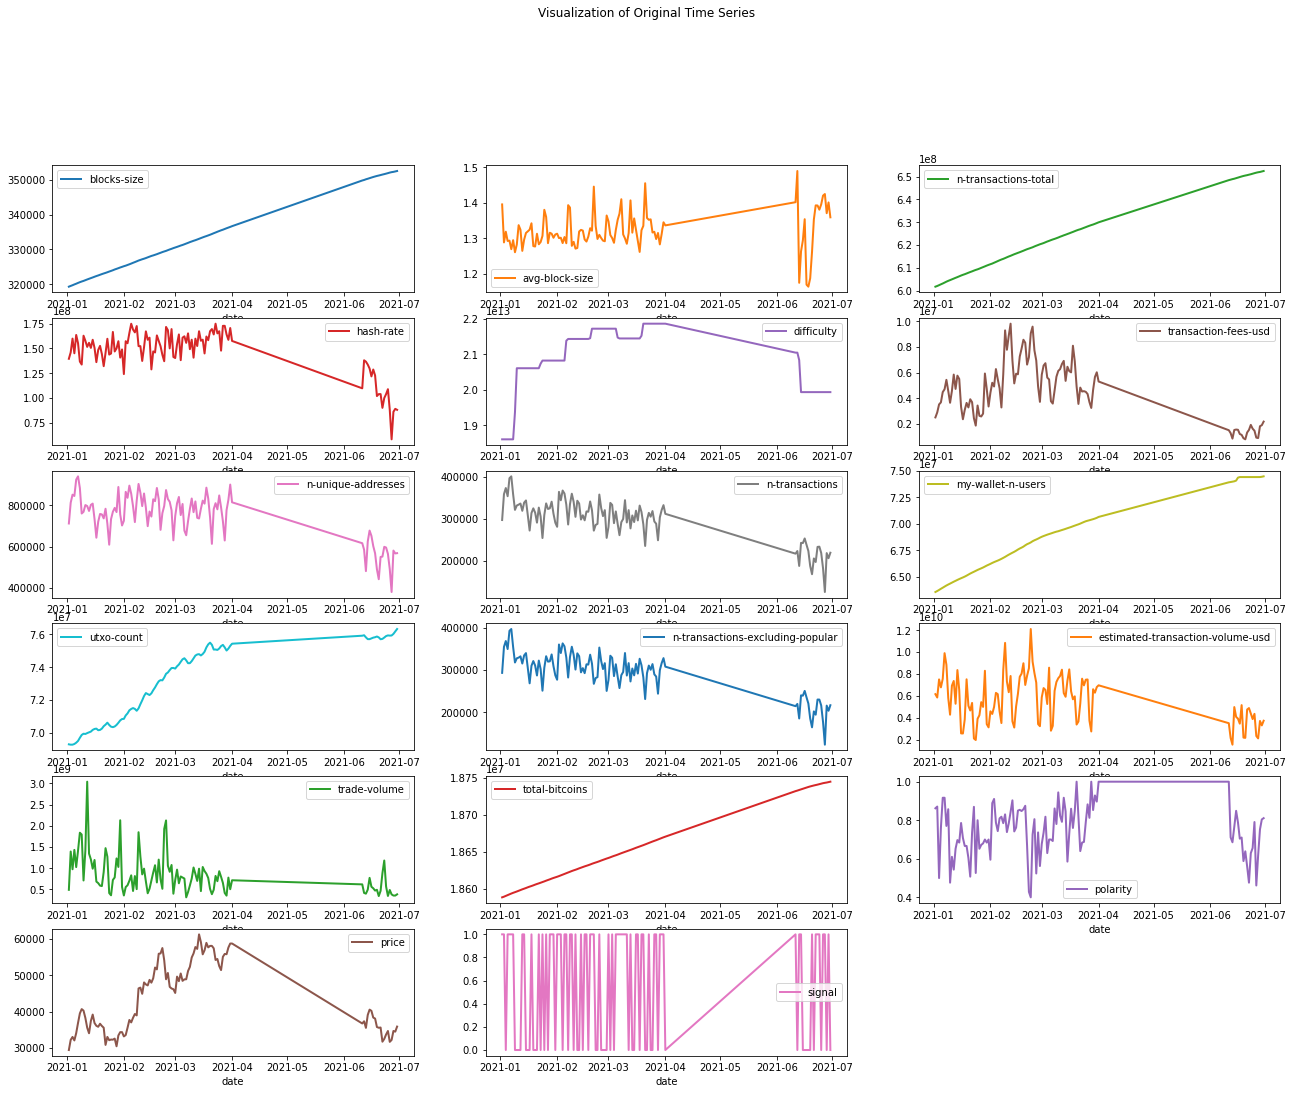

In [17]:
df_chartdata.plot(subplots=True,
        layout=(8, 3),
        figsize=(22,22),
        fontsize=10, 
        linewidth=2,
        sharex=False,
        title='Visualization of Original Time Series')
plt.show()

In [79]:
import plotly.express as px
fig = px.imshow(df_chartdata.corr(method="pearson"))
fig.update_layout(
    title='Correlation Heatmap (Spearman)',
    width=900,
    height=800,
)
fig.show()

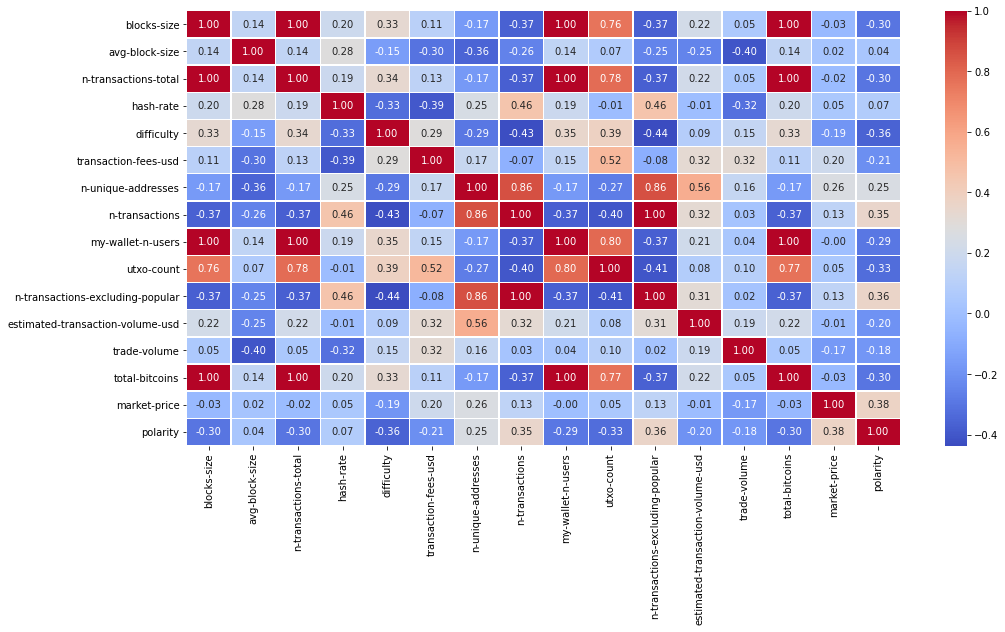

In [78]:
import seaborn as sns

corr_matrix = df_chartdata.corr()
f, ax = plt.subplots(figsize=(16,8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', linewidth=0.4,
            annot_kws={"size": 10}, cmap='coolwarm', ax=ax)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [4]:
df = pd.read_pickle('./data/processed/news_corpus_predict.pkl')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 597 entries, 8303 to 9092
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   datetime         597 non-null    object        
 1   date             597 non-null    datetime64[ns]
 2   news_url         597 non-null    object        
 3   title            597 non-null    object        
 4   text             597 non-null    object        
 5   source_name      597 non-null    object        
 6   sentiment        597 non-null    object        
 7   type             597 non-null    object        
 8   article_title    597 non-null    object        
 9   article_text     597 non-null    object        
 10  article_summary  597 non-null    object        
 11  polarity         597 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 60.6+ KB


In [10]:
df_total = df_chartdata.merge(df[['date','polarity']], on="date", how="inner")
df_total.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   date                              0 non-null      datetime64[ns]
 1   blocks-size                       0 non-null      float64       
 2   avg-block-size                    0 non-null      float64       
 3   n-transactions-total              0 non-null      float64       
 4   hash-rate                         0 non-null      float64       
 5   difficulty                        0 non-null      float64       
 6   transaction-fees-usd              0 non-null      float64       
 7   n-unique-addresses                0 non-null      float64       
 8   n-transactions                    0 non-null      float64       
 9   my-wallet-n-users                 0 non-null      float64       
 10  utxo-count                        0 non-null      float64       
 1

In [10]:
df_total = df_chartdata.merge(df_news[data, on="date", how="inner")
df_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7090 entries, 0 to 7089
Data columns (total 26 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   date                              7090 non-null   datetime64[ns]
 1   blocks-size                       6991 non-null   float64       
 2   avg-block-size                    6991 non-null   float64       
 3   n-transactions-total              6991 non-null   float64       
 4   hash-rate                         6991 non-null   float64       
 5   difficulty                        6991 non-null   float64       
 6   transaction-fees-usd              6991 non-null   float64       
 7   n-unique-addresses                6991 non-null   float64       
 8   n-transactions                    6991 non-null   float64       
 9   my-wallet-n-users                 7090 non-null   float64       
 10  utxo-count                        7090 non-null 

In [4]:
df_news = pd.read_pickle('./data/news_corpus_final.pkl')
df_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8180 entries, 0 to 8179
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   datetime         8180 non-null   object        
 1   date             8180 non-null   datetime64[ns]
 2   news_url         8180 non-null   object        
 3   title            8180 non-null   object        
 4   text             8180 non-null   object        
 5   source_name      8180 non-null   object        
 6   sentiment        8180 non-null   object        
 7   type             8180 non-null   object        
 8   article_title    8180 non-null   object        
 9   article_text     8180 non-null   object        
 10  article_summary  8180 non-null   object        
dtypes: datetime64[ns](1), object(10)
memory usage: 703.1+ KB


In [9]:
sentiment_dict = {'Negative': 0, 'Neutral': 2, 'Positive': 1}
df = df_news
df['polarity'] = df.sentiment.map(sentiment_dict)
df.drop(df[df['polarity'] == 2].index, inplace=True)

In [14]:
df1 = df.groupby(['date'])['polarity'].mean()
df_news1 = df1.reset_index('date')
df_news1.set_index('date', inplace=True)
df_news1.head()

,polarity
date,
2020-12-04,0.600000
2020-12-05,0.444444
2020-12-06,0.900000
2020-12-07,0.866667
2020-12-08,0.616667


In [26]:
df_comb = df_chartdata.merge(df_news1, left_on='date', right_on='date')
df_comb.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 112 entries, 2021-01-01 to 2020-12-31
Data columns (total 16 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   blocks-size                       111 non-null    float64
 1   avg-block-size                    111 non-null    float64
 2   n-transactions-total              111 non-null    float64
 3   hash-rate                         111 non-null    float64
 4   difficulty                        111 non-null    float64
 5   transaction-fees-usd              111 non-null    float64
 6   n-unique-addresses                111 non-null    float64
 7   n-transactions                    111 non-null    float64
 8   my-wallet-n-users                 112 non-null    float64
 9   utxo-count                        112 non-null    float64
 10  n-transactions-excluding-popular  111 non-null    float64
 11  estimated-transaction-volume-usd  111 non-null    fl

In [17]:
df_comb.to_pickle("./data/chartdata-sent.pkl")

In [23]:
df_comb_no_sent = df_comb
df_comb_no_sent.drop(['polarity'], axis=1, inplace=True)
df_comb_no_sent.to_pickle("./data/chartdata-no-sent.pkl")

In [24]:
df_comb_no_sent.head()

,blocks-size,avg-block-size,n-transactions-total,hash-rate,difficulty,transaction-fees-usd,n-unique-addresses,n-transactions,my-wallet-n-users,utxo-count,n-transactions-excluding-popular,estimated-transaction-volume-usd,trade-volume,total-bitcoins,market-price
date,,,,,,,,,,,,,,,
2021-01-01,319114.048500,1.352233,601577750.0,1.377640e+08,1.859959e+13,1.455398e+06,609741.0,258080.0,6.347335e+07,6.950296e+07,255086.0,4.343208e+09,6.065241e+08,1.858723e+07,28982.56
2021-01-02,319315.580633,1.395637,601835959.0,1.396132e+08,1.859959e+13,2.504284e+06,711719.0,297111.0,6.355104e+07,6.930876e+07,293409.0,6.152237e+09,4.912580e+08,1.858817e+07,29393.75
2021-01-03,319526.405445,1.288694,602133929.0,1.460853e+08,1.859959e+13,2.893754e+06,812749.0,359116.0,6.364457e+07,6.928974e+07,355123.0,5.847743e+09,1.393907e+09,1.858911e+07,32195.46
2021-01-04,319729.832857,1.318806,602493027.0,1.599542e+08,1.859959e+13,3.516375e+06,851667.0,373734.0,6.374747e+07,6.928741e+07,368932.0,7.503148e+09,9.758314e+08,1.859013e+07,33000.78
2021-01-05,319957.982033,1.292713,602865747.0,1.451608e+08,1.859959e+13,3.677641e+06,845343.0,354091.0,6.385578e+07,6.932941e+07,349895.0,6.775408e+09,1.432013e+09,1.859119e+07,32035.03


In [32]:
df_comb[df_comb.polarity <= .6].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 31 entries, 2021-01-04 to 2021-04-21
Data columns (total 16 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   blocks-size                       31 non-null     float64
 1   avg-block-size                    31 non-null     float64
 2   n-transactions-total              31 non-null     float64
 3   hash-rate                         31 non-null     float64
 4   difficulty                        31 non-null     float64
 5   transaction-fees-usd              31 non-null     float64
 6   n-unique-addresses                31 non-null     float64
 7   n-transactions                    31 non-null     float64
 8   my-wallet-n-users                 31 non-null     float64
 9   utxo-count                        31 non-null     float64
 10  n-transactions-excluding-popular  31 non-null     float64
 11  estimated-transaction-volume-usd  31 non-null     flo

In [ ]:
import spacy
from spacy.lang.en import English
import networkx as nx
import matplotlib.pyplot as plt

def getSentences(text):
    nlp = English()
    nlp.add_pipe(nlp.create_pipe('sentencizer'))
    document = nlp(text)
    return [sent.string.strip() for sent in document.sents]

def printToken(token):
    print(token.text, "->", token.dep_)

def appendChunk(original, chunk):
    return original + ' ' + chunk

def isRelationCandidate(token):
    deps = ["ROOT", "adj", "attr", "agent", "amod"]
    return any(subs in token.dep_ for subs in deps)

def isConstructionCandidate(token):
    deps = ["compound", "prep", "conj", "mod"]
    return any(subs in token.dep_ for subs in deps)

def processSubjectObjectPairs(tokens):
    subject = ''
    object = ''
    relation = ''
    subjectConstruction = ''
    objectConstruction = ''
    for token in tokens:
        printToken(token)
        if "punct" in token.dep_:
            continue
        if isRelationCandidate(token):
            relation = appendChunk(relation, token.lemma_)
        if isConstructionCandidate(token):
            if subjectConstruction:
                subjectConstruction = appendChunk(subjectConstruction, token.text)
            if objectConstruction:
                objectConstruction = appendChunk(objectConstruction, token.text)
        if "subj" in token.dep_:
            subject = appendChunk(subject, token.text)
            subject = appendChunk(subjectConstruction, subject)
            subjectConstruction = ''
        if "obj" in token.dep_:
            object = appendChunk(object, token.text)
            object = appendChunk(objectConstruction, object)
            objectConstruction = ''

    print (subject.strip(), ",", relation.strip(), ",", object.strip())
    return (subject.strip(), relation.strip(), object.strip())

def processSentence(sentence):
    tokens = nlp_model(sentence)
    return processSubjectObjectPairs(tokens)

def printGraph(triples):
    G = nx.Graph()
    for triple in triples:
        G.add_node(triple[0])
        G.add_node(triple[1])
        G.add_node(triple[2])
        G.add_edge(triple[0], triple[1])
        G.add_edge(triple[1], triple[2])

    pos = nx.spring_layout(G)
    plt.figure()
    nx.draw(G, pos, edge_color='black', width=1, linewidths=1,
            node_size=500, node_color='seagreen', alpha=0.9,
            labels={node: node for node in G.nodes()})
    plt.axis('off')
    plt.show()

if __name__ == "__main__":

    text = "London is the capital and largest city of England and the United Kingdom. Standing on the River " \
           "Thames in the south-east of England, at the head of its 50-mile (80 km) estuary leading to " \
           "the North Sea, London has been a major settlement for two millennia. " \
           "Londinium was founded by the Romans. The City of London, " \
           "London's ancient core − an area of just 1.12 square miles (2.9 km2) and colloquially known as " \
           "the Square Mile − retains boundaries that follow closely its medieval limits." \
           "The City of Westminster is also an Inner London borough holding city status. " \
           "Greater London is governed by the Mayor of London and the London Assembly." \
           "London is located in the southeast of England." \
           "Westminster is located in London." \
           "London is the biggest city in Britain. London has a population of 7,172,036."

    sentences = getSentences(text)
    nlp_model = spacy.load('en_core_web_sm')

    triples = []
    print (text)
    for sentence in sentences:
        triples.append(processSentence(sentence))

    printGraph(triples)

In [33]:
df_news = pd.read_pickle('./data/processed/news_corpus_predict.pkl')
df_news = df_news.groupby(["date"])["polarity"].mean()
df_news = df_news.reset_index("date")
df_news.set_index("date", inplace=True)
df_news.sort_index(inplace=True)
df_news.head()

,polarity
date,
2021-01-02,0.965517
2021-01-03,0.935484
2021-01-04,0.384615
2021-01-05,0.891304
2021-01-06,0.979167


In [31]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go




trace1 = go.Scatter(
            x=df_news.index,
            y=df_news['polarity'],
            mode='lines',
            name='polarity'
            )
layout = dict(
                title='<b>polarity</b>',
                yaxis=dict(title='<b>polarity</b>')
            )
pdata = [trace1]
fig = dict(data=pdata, layout=layout)
iplot(fig, filename="Time Series with Rangeslider")

In [47]:
df_news = pd.read_pickle('./data/raw/news_corpus_091721.pkl')
df_news.set_index("date", inplace=True)
df_news.sort_index(inplace=True)
pd.date_range(start = '2021-01-01', end = '2021-10-03' ).difference(df_news.index)

DatetimeIndex(['2021-01-01', '2021-09-19', '2021-09-20', '2021-09-21',
               '2021-09-22', '2021-09-23', '2021-09-24', '2021-09-25',
               '2021-09-26', '2021-09-27', '2021-09-28', '2021-09-29',
               '2021-09-30', '2021-10-01', '2021-10-02', '2021-10-03'],
              dtype='datetime64[ns]', freq=None)